In [45]:
from google.colab import drive
import pickle # To save the model
from os.path import isfile

In [46]:
mount_point = '/content/gdrive/' # Always the same, don't change it
drive.mount(mount_point, force_remount=True)
drive_path = mount_point + '/MyDrive/' # Always the same, don't change it
my_path = drive_path + \
  'DANI/Data Science/'

Mounted at /content/gdrive/


In [47]:
## Course libraries
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py


--2025-12-15 15:11:11--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py.1’

andrea_models.py.1  100%[===================>]   3.12K  --.-KB/s    in 0s      

2025-12-15 15:11:11 (39.3 MB/s) - ‘andrea_models.py.1’ saved [3190/3190]

--2025-12-15 15:11:11--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from andrea_models import AndreaLinearRegression # In the course library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


In [49]:
df = pd.read_csv(my_path+'pokemon.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1543 non-null   int64  
 1   user_id             1543 non-null   int64  
 2   QoA_VLCresolution   1543 non-null   int64  
 3   QoA_VLCbitrate      1543 non-null   float64
 4   QoA_VLCframerate    1543 non-null   float64
 5   QoA_VLCdropped      1543 non-null   int64  
 6   QoA_VLCaudiorate    1543 non-null   float64
 7   QoA_VLCaudioloss    1543 non-null   int64  
 8   QoA_BUFFERINGcount  1543 non-null   int64  
 9   QoA_BUFFERINGtime   1543 non-null   int64  
 10  QoS_type            1543 non-null   int64  
 11  QoS_operator        1543 non-null   int64  
 12  QoD_model           1543 non-null   object 
 13  QoD_os-version      1543 non-null   object 
 14  QoD_api-level       1543 non-null   int64  
 15  QoU_sex             1543 non-null   int64  
 16  QoU_ag

2 categorical Columns require encoding

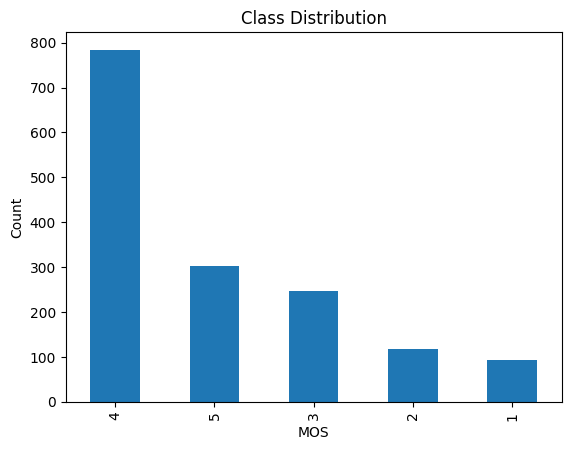

In [50]:
df.MOS.value_counts().plot(kind="bar")
plt.xlabel("MOS")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

Classes are imbalanced

In [51]:
df['QoD_os-version'].unique()

array(['4.1.1(122573.16)', '4.4.2(I9195XXUCNK1)', '4.1.2(I9300XXELL4)',
       '4.4.4(suv3Rw)', '4.4.2(G900FXXU1ANG2)', '4.0.4(20130118.175432)',
       '4.4.2(G900FXXU1ANJ1)', '4.4.2(I9195XXUCNK4)', '5.0.1(457188.4)',
       '5.0.1(1602158)', '4.3(I9300XXUGNB5)', '5.0(G900FXXU1BOC7)',
       '4.3(I9506XXUBML5)', '5.1.1(456c49d1b2)', '5.0(G900FXXU1BOC2)',
       '4.4.2(N9005XXUGNI4)', '5.1.1(478106bf5f)', '4.4.2(G900FXXU1ANG9)'],
      dtype=object)

In [52]:
df['QoD_model'].unique()

array(['HTC One X+', 'GT-I9195', 'GT-I9300', 'D5803', 'SM-G900F',
       'ARCHOS 101G9', 'HTC One_M8', 'Nexus 4', 'SM-N9005', 'GT-I9191',
       'GT-I9192', 'D5802', 'GT-I9189', 'GT-I9194', 'GT-I9193'],
      dtype=object)

In [53]:
df_encoded = df.copy()
# we noticied that QoD_os-version has somme kind of hierarchy in it therefore we will use label encoding
df_encoded['QoD_os-version'] = df_encoded['QoD_os-version'].astype('category').cat.codes

#For the QoD_model it has categories with no apparent hierarchy, to avoid introducing order between categories to the model,
#we will use One-Hot Encoding
df_encoded['QoD_model'] = df_encoded['QoD_model'].astype('category').cat.codes

df_encoded.head()


,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.39294,24.950000,0,43.800000,0,2,683,...,1,16,1,20,5,3,5,3,4,3
1,428,46,360,402.64664,30.066667,0,44.200000,0,2,690,...,8,19,1,25,5,4,5,5,5,5
2,406,44,360,735.84070,24.200000,0,44.183333,0,2,840,...,2,16,1,22,5,3,5,4,4,4
3,1256,133,240,529.48830,24.116667,9,43.850000,0,2,868,...,11,19,1,31,5,4,5,5,5,5
4,244,22,360,736.00085,24.066667,0,43.850000,0,2,869,...,2,16,0,26,5,5,5,4,5,5


In [54]:
df_encoded.isnull().sum()

,0
id,0
user_id,0
QoA_VLCresolution,0
QoA_VLCbitrate,0
QoA_VLCframerate,0
QoA_VLCdropped,0
QoA_VLCaudiorate,0
QoA_VLCaudioloss,0
QoA_BUFFERINGcount,0
QoA_BUFFERINGtime,0


In [55]:
df_encoded.duplicated().sum()

np.int64(0)

<Axes: >

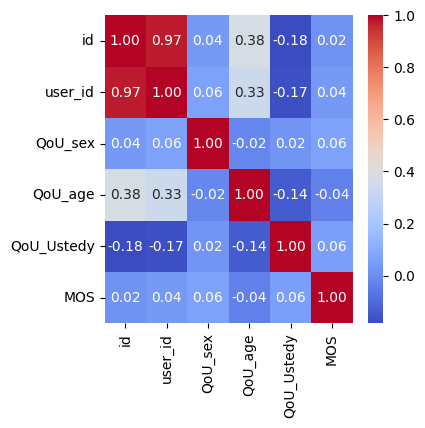

In [56]:
#Checking the correlation of user related features with MOS ==> no correlation found.

plt.figure(figsize=(4, 4))
threshold = 0
user_col = ['id', 'user_id','QoU_sex', 'QoU_age', 'QoU_Ustedy','MOS']
corr = df_encoded[user_col].corr()  # Pearson correlation
strong_correlation = corr[(corr > threshold) | (corr < -threshold)]
sns.heatmap(strong_correlation, annot=True, cmap='coolwarm', fmt=".2f")

In [57]:
# Dropping the user related columns
for col in user_col[:-1]:
  df_encoded = df_encoded.drop(col, axis=1)
  print(f'{col} is dropped')

id is dropped
user_id is dropped
QoU_sex is dropped
QoU_age is dropped
QoU_Ustedy is dropped


In [58]:

imbalanced_col = [col for col in df_encoded.columns if (df_encoded[col].value_counts(normalize=True) > 0.7).max()]
print( imbalanced_col)

['QoA_VLCresolution', 'QoA_VLCaudioloss', 'QoA_BUFFERINGcount', 'QoF_shift']


In [59]:
df_encoded[imbalanced_col].describe(include='all')

,QoA_VLCresolution,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoF_shift
count,1543.000000,1543.000000,1543.000000,1543.000000
mean,354.566429,0.235256,1.392093,4.523655
std,25.939930,1.133616,0.895943,0.953146
min,16.000000,0.000000,1.000000,1.000000
25%,360.000000,0.000000,1.000000,4.000000
50%,360.000000,0.000000,1.000000,5.000000
75%,360.000000,0.000000,2.000000,5.000000
max,360.000000,14.000000,10.000000,5.000000


<Axes: >

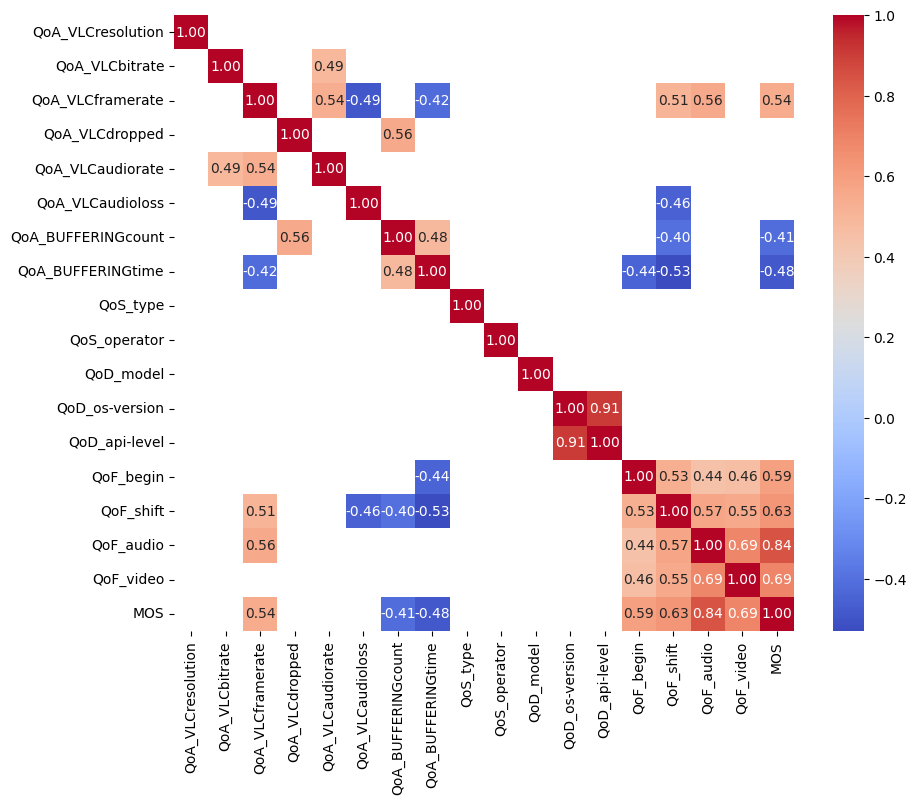

In [60]:
plt.figure(figsize=(10, 8))
threshold = 0.4 # Visualize highly correlated faetures
corr = df_encoded.corr()  # Pearson correlation
strong_correlation = corr[(corr > threshold) | (corr < -threshold)]
sns.heatmap(strong_correlation, annot=True, cmap='coolwarm', fmt=".2f")

In [61]:
df_encoded = df_encoded.drop('QoD_os-version', axis=1)#droping one of the 2 correlated columns

In [62]:
#data split
x = df_encoded.drop('MOS', axis=1)
y = df_encoded['MOS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

In [63]:
# starting with a simple linear regression model
model = AndreaLinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
MSE = mean_squared_error(y_test,pred)
print(f'MSE: {MSE}',f'RMSE: {MSE**0.5}')
model.summary()


MSE: 0.19639514173655245 RMSE: 0.44316491483030607
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     298.1
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:11:13   Log-Likelihood:                -833.93
No. Observations:                1234   AIC:                             1702.
Df Residuals:                    1217   BIC:                             1789.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [64]:
# We see from the model summary above that the columns 1,2,8,9,10,11,12 have high p-values;
# results coherent with correlation matrix, except for column 8 QoA_BUFFERINGtime, we will monitor MSE while dropping
columns = x_train.columns
print(columns)
high_p_value = [11,1,10,8,9,12,2]
for col in high_p_value:
  print(f'x{col}==>',columns[col-1])

Index(['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate',
       'QoA_VLCdropped', 'QoA_VLCaudiorate', 'QoA_VLCaudioloss',
       'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime', 'QoS_type', 'QoS_operator',
       'QoD_model', 'QoD_api-level', 'QoF_begin', 'QoF_shift', 'QoF_audio',
       'QoF_video'],
      dtype='object')
x11==> QoD_model
x1==> QoA_VLCresolution
x10==> QoS_operator
x8==> QoA_BUFFERINGtime
x9==> QoS_type
x12==> QoD_api-level
x2==> QoA_VLCbitrate


In [65]:
for col in high_p_value:
  x_train = x_train.drop(columns[col-1],  axis=1)
  x_test = x_test.drop(columns[col-1], axis=1)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  MSE = mean_squared_error(y_test,pred)
  print(f'MSE: {MSE:.4f}',f'RMSE: {MSE**0.5:.4f}', f'After dropping {columns[col-1]}')
model.summary()
print('The current list of columns: ', x_train.columns)


MSE: 0.1964 RMSE: 0.4431 After dropping QoD_model
MSE: 0.1970 RMSE: 0.4439 After dropping QoA_VLCresolution
MSE: 0.1975 RMSE: 0.4444 After dropping QoS_operator
MSE: 0.1995 RMSE: 0.4466 After dropping QoA_BUFFERINGtime
MSE: 0.2001 RMSE: 0.4473 After dropping QoS_type
MSE: 0.2003 RMSE: 0.4475 After dropping QoD_api-level
MSE: 0.2021 RMSE: 0.4496 After dropping QoA_VLCbitrate
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     529.4
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:11:14   Log-Likelihood:                -837.23
No. Observations:                1234   AIC:                             1694.
Df Residuals:                    1224   BIC:                          

- What if the relationship is not linear between the variables we dropped and the target

- Next section use plynomial linear regression and test it with diffrent degrees

In [66]:
# let's check polynomial regression, including only the selected columns so far.
degree = [2,3,4,5]
for p in degree:
  model = Pipeline([
      ("poly", PolynomialFeatures(degree=p, include_bias=False)),
      ("lin_reg", AndreaLinearRegression())
  ])
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  MSE = mean_squared_error(y_test,pred)
  print(f'For degree {p} the ',f'MSE: {MSE:.3f}',f'RMSE: {MSE**0.5:.3f}')


For degree 2 the  MSE: 0.185 RMSE: 0.430
For degree 3 the  MSE: 2.077 RMSE: 1.441
For degree 4 the  MSE: 207706640.997 RMSE: 14412.031
For degree 5 the  MSE: 117535123397716.375 RMSE: 10841361.695


The best degree we can use is 2 better than degree =1

In [67]:
#let's include the columns we dropped using p-value, with degree 2 and see if results improve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)
model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", AndreaLinearRegression())
])
model.fit(x_train,y_train)
pred = model.predict(x_test)
MSE = mean_squared_error(y_test,pred)
print(f'For degree {2} and including all columns, the ',
      f'MSE: {MSE:.3f}',f'RMSE: {MSE**0.5:.3f}',
      f' R²: {model.score(x_test,y_test): .3f}')


For degree 2 and including all columns, the  MSE: 0.209 RMSE: 0.457  R²:  0.814


The RMSE increased from 0.43 to 0.457, the columns we dropped has negative impact on the model

In [68]:
#let's see their individual impact, drop one by one as we did before and check RMSE
for col in high_p_value:
  model = Pipeline([
      ("poly", PolynomialFeatures(degree=2, include_bias=False)),
      ("lin_reg", AndreaLinearRegression())
  ])
  x_train = x_train.drop(columns[col-1],  axis=1)
  x_test = x_test.drop(columns[col-1], axis=1)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  MSE = mean_squared_error(y_test,pred)
  print(f'For degree {2} , the ',f'MSE: {MSE:.3f}',
        f'RMSE: {MSE**0.5:.3f}', f'after dropping {columns[col]}',
        f' R²: {model.score(x_test,y_test): .3f}')

For degree 2 , the  MSE: 0.205 RMSE: 0.453 after dropping QoD_api-level  R²:  0.818
For degree 2 , the  MSE: 0.189 RMSE: 0.434 after dropping QoA_VLCbitrate  R²:  0.832
For degree 2 , the  MSE: 0.186 RMSE: 0.431 after dropping QoD_model  R²:  0.835
For degree 2 , the  MSE: 0.198 RMSE: 0.444 after dropping QoS_type  R²:  0.824
For degree 2 , the  MSE: 0.189 RMSE: 0.435 after dropping QoS_operator  R²:  0.831
For degree 2 , the  MSE: 0.189 RMSE: 0.434 after dropping QoF_begin  R²:  0.832
For degree 2 , the  MSE: 0.185 RMSE: 0.430 after dropping QoA_VLCframerate  R²:  0.836


RMSE and R² improved gradually after dropping each column, ==> these columns have no linear or quadratic correlation with the target MOS

# Random Forest Regressor

In [69]:
# Testing with diffrent depth values
for d in range(1,20):
  rf = RandomForestRegressor(
      n_estimators=300,
      max_depth=d,
      min_samples_leaf=1,
      random_state=42,
      n_jobs=-1
  )

  rf.fit(x_train, y_train)
  y_pred = rf.predict(x_test)

  mse_tree = mean_squared_error(y_test, y_pred)
  print(mse_tree)

0.5454976008755554
0.2894026151538535
0.19993935303924176
0.17823332357878988
0.1807883305070604
0.1891241893809312
0.19866153632330807
0.20407289643054805
0.21086834554383738
0.21544220394023794
0.21847253588631602
0.22030750272327543
0.22286846678278674
0.22275599246175792
0.22489558220774505
0.22483078258531758
0.2260929199921918
0.22664703746998158
0.22740883530118747


The best depth value is 4

In [70]:
# testing with diffrent number of estimators (trees)
mse_list = []
for n in range(1,50):
  rf = RandomForestRegressor(
      n_estimators=n*10,
      max_depth=4,
      min_samples_leaf=1,
      random_state=42,
      n_jobs=-1
  )

  rf.fit(x_train, y_train)
  y_pred = rf.predict(x_test)

  mse_tree = mean_squared_error(y_test, y_pred)
  mse_list.append(mse_tree)
  if n%5==0:
    print(mse_tree)

0.18259419766778942
0.17988289129665064
0.17934513449152287
0.17924267505704122
0.17909463766455658
0.17823332357878988
0.1780254619267854
0.17820976485151827
0.17815742476116353


In [71]:
print('The best MSE / RMSE reached: ', min(mse_list), 'with number of trees',(mse_list.index(min(mse_list))+1)*10)

The best MSE / RMSE reached:  0.17789688625050717 with number of trees 420


Text(0.5, 1.0, 'Test MSE and Num Trees')

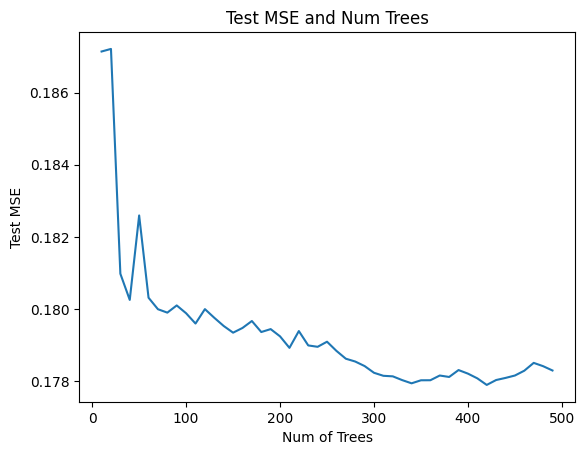

In [72]:
# Evolution of Test MSE with number of estimators (trees)
indices = [i*10 for i in range(1,len(mse_list)+1)]

plt.plot(indices, mse_list)
plt.xlabel("Num of Trees")
plt.ylabel("Test MSE")
plt.title("Test MSE and Num Trees")

# Round predicted values to classes

In [73]:
# Our Plynomial regression model, we only round the predicted values to classes
model_poly_reg = Pipeline([
      ("poly", PolynomialFeatures(degree=2, include_bias=False)),
      ("lin_reg", AndreaLinearRegression())
  ])
model_poly_reg.fit(x_train,y_train)
pred_poly_reg = model_poly_reg.predict(x_test)
pred_poly_reg = np.round(pred_poly_reg).astype(int)
pred_poly_reg = np.where(pred_poly_reg==0,1,pred_poly_reg)
score_poly_reg = accuracy_score(y_test, pred_poly_reg)
print(f'The accuarcy: {score_poly_reg:.3f}')

The accuarcy: 0.803


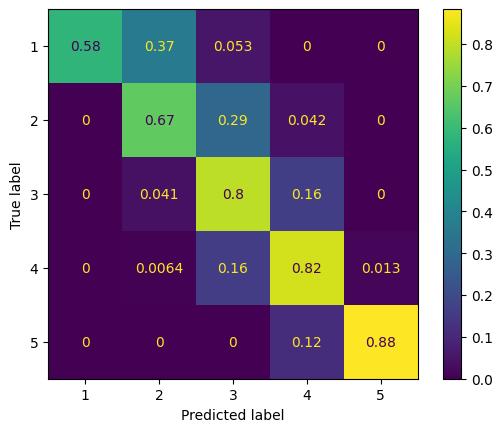

In [74]:
# confusion matrix
cm = confusion_matrix(y_test, pred_poly_reg)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm = confusion_matrix(y_test, pred_poly_reg)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
labels = np.array([1,2,3,4,5])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
cm_display.plot(cmap='viridis')
plt.show()


# Random Forest Classifier

In [75]:
rf = RandomForestClassifier(
    n_estimators=420,
    max_depth=4,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.7572815533980582
              precision    recall  f1-score   support

           1       0.94      0.79      0.86        19
           2       0.70      0.29      0.41        24
           3       0.41      0.37      0.39        49
           4       0.77      0.92      0.84       157
           5       0.96      0.83      0.89        60

    accuracy                           0.76       309
   macro avg       0.76      0.64      0.68       309
weighted avg       0.75      0.76      0.74       309



<Figure size 600x500 with 0 Axes>

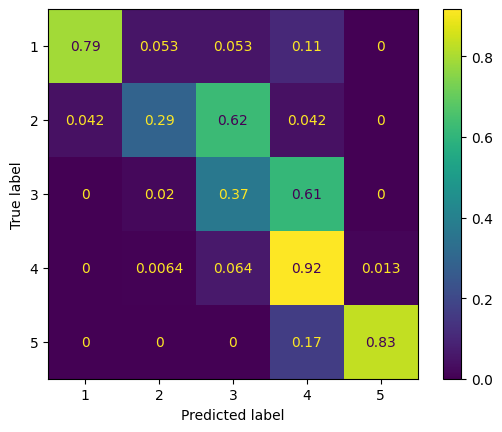

In [76]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 5))
labels = np.array([1,2,3,4,5])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
cm_display.plot(cmap='viridis')
plt.show()